# Import Libraries

In [40]:
import pandas as pd
import numpy as np
#Load data
data=pd.read_csv("E:/Dataset/waterways.csv")

In [41]:
data.head()

,YEAR,National Waterways- I,National Waterways- II,National Waterways-III,Total
0,2003-04,1596,296,219,2111
1,2004-05,3119,381,154,3654
2,2005-06,4109,322,169,4600
3,2006-07,5803,1728,149,7680
4,2007-08,7092,422,89,7603


# Remove unwanted features

In [42]:
features=data[["National Waterways- I","National Waterways- II","National Waterways-III"]]
#Standardize the data
features=features.copy()
for value in features.columns:
    features[value]=features[value]-features[value].mean()
#Calculate covariance matrix
cov_mat=np.cov(features,rowvar=False)

# Calculate Eigen values and eigen vectors

In [43]:
eigen_values,eigen_vectors=np.linalg.eigh(cov_mat)
#Sort eigen values 
sorted_index=np.argsort(eigen_values)[::-1]
sorted_eigen_values=eigen_values[sorted_index]
#Sort eigen vectors
sorted_eigen_vectors=eigen_vectors[:,sorted_index]


# Pick k eigen values and eigen vectors

In [44]:
n_components=1
eigen_vector_subset=sorted_eigen_vectors[:,0:n_components]


# Transform the data


In [45]:
features_reduced=np.dot(eigen_vector_subset.transpose(),features.transpose()).transpose()
df=pd.DataFrame(features_reduced,columns=["PC1"])
df=pd.concat([df,data["YEAR"]],axis=1)
print(df)

            PC1     YEAR
0   7466.068577  2003-04
1   5942.419562  2004-05
2   4952.811107  2005-06
3   3251.125117  2006-07
4   1969.060067  2007-08
5   1994.650670  2008-09
6  -1338.951256  2009-10
7  -3241.478320  2010-11
8  -5485.683709  2011-12
9  -6058.468965  2012-13
10 -9451.552850  2013-14


# Visualize data

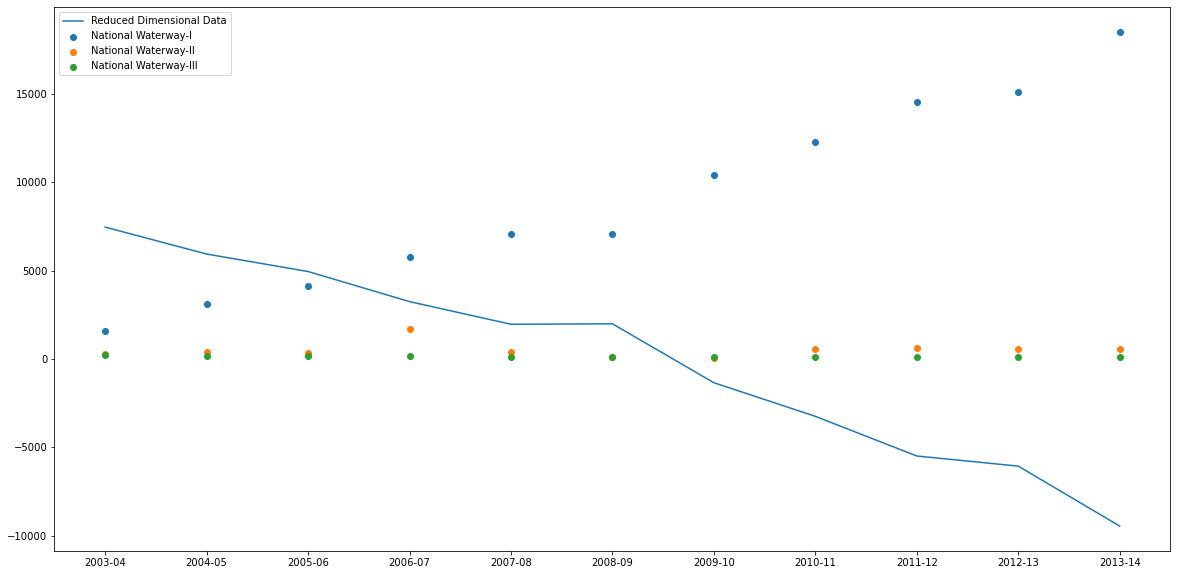

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.plot(df["YEAR"],df["PC1"],label="Reduced Dimensional Data")
plt.scatter(data["YEAR"],data["National Waterways- I"],label="National Waterway-I")
plt.scatter(data["YEAR"],data["National Waterways- II"],label="National Waterway-II")
plt.scatter(data["YEAR"],data["National Waterways-III"],label="National Waterway-III")
plt.legend(loc="upper left")
plt.show()